## Homework-3: MNIST Classification with ConvNet

### **Deadline: 2021.04.06 23:59:00 **

### In this homework, you need to
- #### implement the forward and backward functions for ConvLayer (`layers/conv_layer.py`)
- #### implement the forward and backward functions for PoolingLayer (`layers/pooling_layer.py`)
- #### implement the forward and backward functions for DropoutLayer (`layers/dropout_layer.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [1, 28, 28])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [4]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))
x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## Set Hyperparameters
You can modify hyperparameters by yourself.

In [6]:
batch_size = 100
max_epoch = 10
init_std = 0.1

learning_rate = 0.001
weight_decay = 0.005

disp_freq = 50

## Criterion and Optimizer

In [7]:
from criterion import SoftmaxCrossEntropyLossLayer
from optimizer import SGD

criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate, weight_decay)

## ConvNet

In [78]:
from layers import FCLayer, ReLULayer, ConvLayer, MaxPoolingLayer, ReshapeLayer

convNet = Network()
convNet.add(ConvLayer(1, 8, 3, 1))
convNet.add(ReLULayer())
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ConvLayer(8, 16, 3, 1))
convNet.add(ReLULayer())
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ReshapeLayer((batch_size, 16, 7, 7), (batch_size, 784)))
convNet.add(FCLayer(784, 128))
convNet.add(ReLULayer())
convNet.add(FCLayer(128, 10))

In [79]:
# Train
convNet.is_training = True
convNet, conv_loss, conv_acc = train(convNet, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][10]	 Batch [0][550]	 Training Loss 8.5022	 Accuracy 0.1200
Epoch [0][10]	 Batch [50][550]	 Training Loss 2.8374	 Accuracy 0.2557
Epoch [0][10]	 Batch [100][550]	 Training Loss 2.1853	 Accuracy 0.3799
Epoch [0][10]	 Batch [150][550]	 Training Loss 1.8806	 Accuracy 0.4491
Epoch [0][10]	 Batch [200][550]	 Training Loss 1.6830	 Accuracy 0.5039
Epoch [0][10]	 Batch [250][550]	 Training Loss 1.5447	 Accuracy 0.5443
Epoch [0][10]	 Batch [300][550]	 Training Loss 1.4421	 Accuracy 0.5757
Epoch [0][10]	 Batch [350][550]	 Training Loss 1.3708	 Accuracy 0.6007
Epoch [0][10]	 Batch [400][550]	 Training Loss 1.3107	 Accuracy 0.6221
Epoch [0][10]	 Batch [450][550]	 Training Loss 1.2644	 Accuracy 0.6408
Epoch [0][10]	 Batch [500][550]	 Training Loss 1.2278	 Accuracy 0.6559

Epoch [0]	 Average training loss 1.1981	 Average training accuracy 0.6695
Epoch [0]	 Average validation loss 0.8341	 Average validation accuracy 0.8522

Epoch [1][10]	 Batch [0][550]	 Training Loss 0.9138	 Accuracy 0.8200

In [80]:
# Test
convNet.is_training = False
test(convNet, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.0980.



## Plot

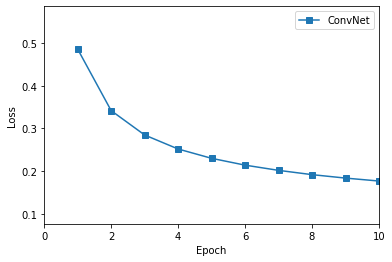

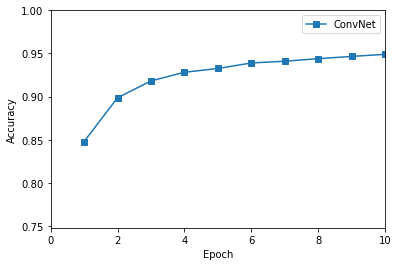

In [62]:
plot_loss_and_acc({'ConvNet': [conv_loss, conv_acc]})

### ~~You have finished homework3, congratulations!~~  

**Next, according to the requirements (4):**
### **You need to implement the Dropout layer and train the network again.**

In [12]:
from layers import DropoutLayer
from layers import FCLayer, ReLULayer, ConvLayer, MaxPoolingLayer, ReshapeLayer, DropoutLayer

# build your network
convNet = Network()
convNet.add(ConvLayer(1, 8, 3, 1))
convNet.add(ReLULayer())
convNet.add(DropoutLayer(0.5))
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ConvLayer(8, 16, 3, 1))
convNet.add(ReLULayer())
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ReshapeLayer((batch_size, 16, 7, 7), (batch_size, 784)))
convNet.add(FCLayer(784, 128))
convNet.add(ReLULayer())
convNet.add(FCLayer(128, 10))



# training
convNet.is_training = True
convNet, conv_loss, conv_acc = train(convNet, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

# testing
convNet.is_training = False
test(convNet, criterion, data_test, batch_size, disp_freq)

Epoch [0][10]	 Batch [0][550]	 Training Loss 10.4167	 Accuracy 0.0600
Epoch [0][10]	 Batch [50][550]	 Training Loss 3.3828	 Accuracy 0.1806
Epoch [0][10]	 Batch [100][550]	 Training Loss 2.8150	 Accuracy 0.2557
Epoch [0][10]	 Batch [150][550]	 Training Loss 2.5142	 Accuracy 0.3018
Epoch [0][10]	 Batch [200][550]	 Training Loss 2.3091	 Accuracy 0.3426
Epoch [0][10]	 Batch [250][550]	 Training Loss 2.1413	 Accuracy 0.3786
Epoch [0][10]	 Batch [300][550]	 Training Loss 2.0102	 Accuracy 0.4078
Epoch [0][10]	 Batch [350][550]	 Training Loss 1.9100	 Accuracy 0.4304
Epoch [0][10]	 Batch [400][550]	 Training Loss 1.8222	 Accuracy 0.4512
Epoch [0][10]	 Batch [450][550]	 Training Loss 1.7481	 Accuracy 0.4705
Epoch [0][10]	 Batch [500][550]	 Training Loss 1.6842	 Accuracy 0.4869

Epoch [0]	 Average training loss 1.6231	 Average training accuracy 0.5041
Epoch [0]	 Average validation loss 0.8876	 Average validation accuracy 0.7158

Epoch [1][10]	 Batch [0][550]	 Training Loss 0.7424	 Accuracy 0.740

In [ ]:
plot_loss_and_acc({'ConvNet': [conv_loss, conv_acc]})